- requests
- status codes
- BeautifulSoup
- sitemap

### Requests

In [36]:
import os
import re
import requests

In [89]:
url = 'https://www.udacity.com/course/intro-to-descriptive-statistics--ud827'
headers = {'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36'
           ' (KHTML, like Gecko) Chrome/59.0.3071.115 Safari/537.36'}
response = requests.get(url, headers = headers)

In [92]:
response.request.headers

{'Accept-Encoding': 'gzip, deflate', 'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/59.0.3071.115 Safari/537.36', 'Connection': 'keep-alive', 'Accept': '*/*'}

In [86]:
#Cómo imprimimos el diccionario más organizadamente?
response.headers

{'Transfer-Encoding': 'chunked', 'X-Frame-Options': 'SAMEORIGIN', 'X-Request-Id': '5429a058-5a5e-4df6-94ff-ebafd52ccbdb', 'Access-Control-Allow-Headers': 'X-Berlioz-Country', 'Access-Control-Expose-Headers': 'X-Berlioz-Country', 'X-XSS-Protection': '1; mode=block', 'Content-Encoding': 'gzip', 'Content-Type': 'text/html; charset=utf-8', 'Set-Cookie': '_www_session=Mld6eE5kU3N0Nm9xblI4R3MwbHNyQ0lmTU1qZkx5SDZBQWFOQ1NhaE9zdnllanFGNjIxd3VEY0ZlTzhQYWlBbGVHRy83bEJCWFJlMFhOVXVBV1hIY0k2blZSbGhlZ1JDOUwyTmxYU0FCQ0ZWRC94UXdNVCtTTEp4eE53QWFaMXQzSHdqeGM3cDJFSHdsZkJWVkZuYk5nPT0tLUVtRTVRbi8rUEk5bTVsQ1RoejFLMUE9PQ%3D%3D--49ec22f8a9cb1daba62db5d78f95576c753f4676; path=/; HttpOnly', 'Cache-Control': 'max-age=0, private, must-revalidate', 'X-Berlioz-Country': 'AR', 'ETag': 'W/"ac7a682eb9868d2395160aa3224766f6"', 'X-Runtime': '0.086168', 'Vary': 'Accept-Encoding', 'X-Content-Type-Options': 'nosniff'}

In [33]:
response.status_code

200

In [35]:
response.encoding
#response.text / response.content

'utf-8'

In [51]:
p = set([w for w in re.findall('<li>([\w ,]+?\.)<', str(response.content))])
p

{'Apply the concepts of probability and normalization to sample data sets.',
 'Compute proportions using standardized distributions.',
 'Create and interpret histograms, bar charts, and frequency plots.',
 'Explore data through the use of bar graphs, histograms, box plots, and other common visualizations.',
 'Identify outliers in data sets using the concept of the interquartile range.',
 'Introduction to several statistical study methods.',
 'Investigate distributions and understand a distributions properties.',
 'Learn the positives and negatives of each.',
 'Manipulate distributions to make probabilistic predictions on data.',
 'Quantify the spread of data using the range and standard deviation.',
 'Take your data and display it to the world.',
 'Use statistical research methods.'}

#### Usando regex y requests, extraigan los nombres de todas las obras de Bach del siguiente link y guardenlos en un .txt

In [1]:
url = 'https://es.wikipedia.org/wiki/Anexo:Composiciones_de_Johann_Sebastian_Bach'

## BeautifulSoup

<tag attribute="value">content</tag>

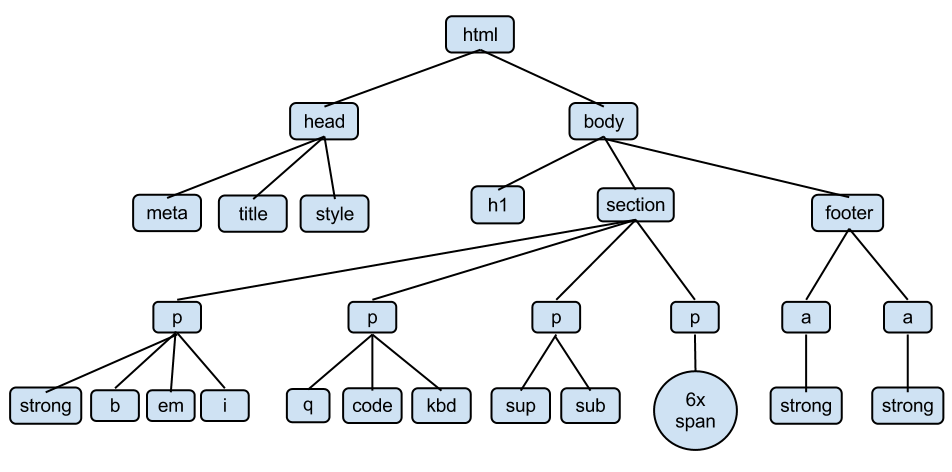

In [55]:
Image(r'E:\Data Science\Archivos\tree.png')

In [ ]:
Con BeautifulSoup, descargá las obras de Bach pero con sus respectivas categorías

### Usá BeautifulSoup para descargar los temas del siguiente curso (podés también usar regex)

In [61]:
url = 'https://www.udacity.com/course/intro-to-descriptive-statistics--ud827'

In [ ]:
url = 'http://ciudadseva.com/autor/julio-cortazar/cuentos/'

response = requests.get(url)

for s_url in re.findall('(http://ciudadseva.com/texto/.+?/)', response.text):
    cuento = requests.get(s_url)
    soup = BeautifulSoup(cuento.content, 'html.parser')
    for elem in soup.findAll("div", { "class" : "text-justify" })[:2]:
        cuento = elem.text
    with open (s_url.split('/')[-2] + '.txt', 'w') as out:
        out.write(cuento)

Escrapeá de otro sitio:

'https://weworkremotely.com/categories/2-programming/jobs'

'https://www.ncbi.nlm.nih.gov/pubmed/?term=' + 

'https://people.eecs.berkeley.edu/~alig/papers/'

'https://listado.mercadolibre.com.ar/gibson'

pubmed

# Mercadolibre

Descargá información de algún producto de MercadoLibre. Fijate si podés entrar a los productos y recolectar algunos datos!

In [4]:
import requests
import re
url = 'https://listado.mercadolibre.com.ar/gibson'

In [10]:
res = requests.get(url)
re.findall(r'price__fraction.+?>(.+?)<', res.text)[:10]

['129.000',
 '115.000',
 '141.113',
 '276.000',
 '756.512',
 '322.000',
 '364.837',
 '163.626',
 '42.835',
 '74.592']

<font size = 3>Usá Requests para descargar los pdfs de esta página:

https://github.com/jdwittenauer/ipython-notebooks/tree/master/exercises/ML

In [1]:
import requests as rq
import re

In [1]:
def get_pdfs(url, path):
    content = rq.get(url).text
    pattern = r'\/(.+?pdf)'
    #cambio para descargar
    urls = [r'https://github.com/' + re.sub(r'/blob/', r'/raw/', url_) for url_ in re.findall(pattern, content)]
    for url_ in urls:
        pdf = rq.get(url_).content
        autor = url_.split('/')[3]
        nombrePdf = url_.split('/')[-1]
        file = '{} {}'.format(autor, nombrePdf)
        print(file)
        with open(file, 'wb') as out:
            out.write(pdf)
    return None

In [3]:
get_pdfs(url = r'https://github.com/jdwittenauer/ipython-notebooks/tree/master/exercises/ML', path = r'D:\Matias\PDFs Ciencia')

jdwittenauer ex1.pdf
jdwittenauer ex2.pdf
jdwittenauer ex3.pdf
jdwittenauer ex4.pdf
jdwittenauer ex5.pdf
jdwittenauer ex6.pdf
jdwittenauer ex7.pdf
jdwittenauer ex8.pdf
